# Cryptocurrency price prediction with LSTM

## In this project, I will use a Long-short term memory neural network to create predictions of the Binance coin (BNB) price according to the previous days' behavior

In [1]:
#First, let's import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
#The dataset was obtained from Kaggle's dataset
dataset=pd.read_csv('coin_BinanceCoin.csv')

In [3]:
dataset.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0


In [4]:
#Let's use a significant part as training for our network, 1050 days out of 1312, of closing prices.
train_set=dataset.iloc[:1050, 7:8].values
test_set=dataset.iloc[1050:, 7:8].values

#Since our data varies a lot, let's scale it first
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_set_scaled = sc.fit_transform(train_set)

x_train = []
y_train = []

#The 'shift' is how many days I want to predict based on (train_len) previous days
shift=5
train_len=60

In [18]:
len(test_set)

263

In [5]:
#Create a matrix with periods of 60 (train_len) days that would imply the next 5 (shift)
for i in range(train_len,1050-shift):
    x_train.append(train_set_scaled[i-train_len:i,0])
    y_train.append(train_set_scaled[i:i+shift,0])

In [6]:
#To convert them as numpy.arrays in order to use them in the LSTM
x_train, y_train = np.array(x_train), np.array(y_train)

In [7]:
#The training set of LSTM must have this kind of shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [8]:
modelo = Sequential()
modelo.add(LSTM(units=128, input_shape=(x_train.shape[1], 1)))
modelo.add(Dense(shift, name="output_layer"))
modelo.compile(optimizer='adam', loss = 'mean_squared_error')
modelo.fit(x_train, y_train, batch_size = 32, epochs=20)

Train on 985 samples
Epoch 1/20
985/985 [==============================] - 5s 5ms/sample - loss: 0.0306
Epoch 2/20
985/985 [==============================] - 2s 2ms/sample - loss: 0.0039
Epoch 3/20
985/985 [==============================] - 2s 2ms/sample - loss: 0.0037
Epoch 4/20
985/985 [==============================] - 2s 2ms/sample - loss: 0.0033
Epoch 5/20
985/985 [==============================] - 2s 2ms/sample - loss: 0.0032
Epoch 6/20
985/985 [==============================] - 2s 2ms/sample - loss: 0.0031
Epoch 7/20
985/985 [==============================] - 2s 2ms/sample - loss: 0.0029
Epoch 8/20
985/985 [==============================] - 2s 2ms/sample - loss: 0.0029
Epoch 9/20
985/985 [==============================] - 2s 2ms/sample - loss: 0.0028
Epoch 10/20
985/985 [==============================] - 2s 3ms/sample - loss: 0.0026
Epoch 11/20
985/985 [==============================] - 3s 3ms/sample - loss: 0.0026
Epoch 12/20
985/985 [==============================] - 3s 3ms/sa

In [11]:
#Out of the complete closing price column, we extract the untrained ones
total_set=dataset.iloc[:, 7:8].values
inputs = total_set[1050:]
inputs = sc.transform(inputs)
len(inputs)

263

In [19]:
#Since we have 263 days to use our network, we may choose some intervals of 60 days to see predictions
interv=50
x_test = []
x_test.append(inputs[interv:interv+train_len,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
p_set = modelo.predict(x_test)
p_set = sc.inverse_transform(p_set)
p_set=np.reshape(p_set, (shift,))
x_p=list(np.arange(interv+train_len,interv+train_len+shift))

In [20]:
interv2=120
x_test2 = []
x_test2.append(inputs[interv2:interv2+train_len,0])
x_test2 = np.array(x_test2)
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1))
p_set2 = modelo.predict(x_test2)
p_set2 = sc.inverse_transform(p_set2)
p_set2=np.reshape(p_set2, (shift,))
x_p2=list(np.arange(interv2+train_len,interv2+train_len+shift))

In [21]:
interv3=180
x_test3 = []
x_test3.append(inputs[interv3:interv3+train_len,0])
x_test3 = np.array(x_test3)
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1))
p_set3 = modelo.predict(x_test3)
p_set3 = sc.inverse_transform(p_set3)
p_set3=np.reshape(p_set3, (shift,))
x_p3=list(np.arange(interv3+train_len,interv3+train_len+shift))

In [27]:
interv4=200
x_test4 = []
x_test4.append(inputs[interv4:interv4+train_len,0])
x_test4 = np.array(x_test4)
x_test4 = np.reshape(x_test4, (x_test4.shape[0], x_test4.shape[1], 1))
p_set4 = modelo.predict(x_test4)
p_set4 = sc.inverse_transform(p_set4)
p_set4=np.reshape(p_set4, (shift,))
x_p4=list(np.arange(interv4+train_len,interv4+train_len+shift))

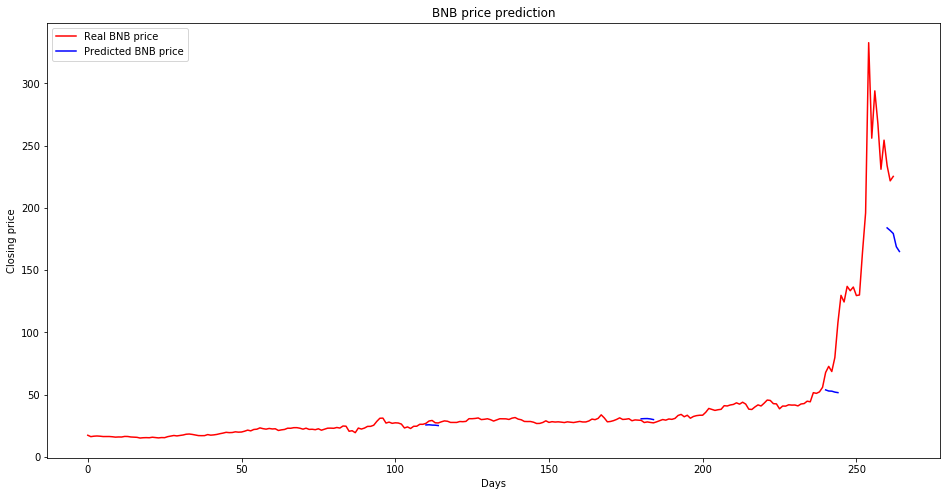

In [28]:
#Let's see the results
plt.figure(figsize=(16,8))
plt.plot(test_set, color = 'red', label = 'Real BNB price')
plt.plot(x_p,p_set, color = 'blue', label = 'Predicted BNB price')
plt.plot(x_p2,p_set2, color = 'blue')
plt.plot(x_p3,p_set3, color = 'blue')
plt.plot(x_p4,p_set4, color = 'blue')
#plt.xlim(1, 90)
plt.title('BNB price prediction')
plt.xlabel('Days')
plt.ylabel('Closing price')
plt.legend()
plt.show()

In [ ]:
#This network, for now, cannot respond fast enough to the fast variations of the last spikes,
#that are extremelly anomalous compared to the flat region where the net work was trained (and actually is preety good)